### Forecasting Using FbProphet

In [1]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

In [3]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [5]:
df.isnull().sum()

Month       0
Sunspots    0
dtype: int64

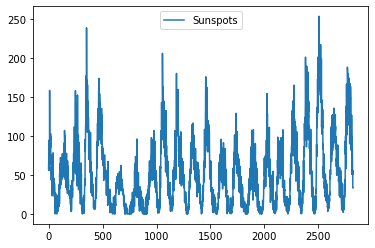

In [6]:
df.plot()

In [7]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.tail()

,ds,y
2815,1983-08-01,71.8
2816,1983-09-01,50.3
2817,1983-10-01,55.8
2818,1983-11-01,33.3
2819,1983-12-01,33.4


In [10]:
from fbprophet import Prophet

In [11]:
# Initialize the Model
model=Prophet()

In [12]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [14]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [15]:
future_dates.tail()

,ds
3180,1984-11-26
3181,1984-11-27
3182,1984-11-28
3183,1984-11-29
3184,1984-11-30


In [16]:
prediction=model.predict(future_dates)

In [17]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-01-01,56.934103,2.251771,106.662682,56.934103,56.934103,-2.708563,-2.708563,-2.708563,-2.708563,-2.708563,-2.708563,0.0,0.0,0.0,54.225540
1,1749-02-01,56.913722,5.383290,103.305344,56.913722,56.913722,-1.571807,-1.571807,-1.571807,-1.571807,-1.571807,-1.571807,0.0,0.0,0.0,55.341915
2,1749-03-01,56.895314,2.467675,104.019348,56.895314,56.895314,-2.435607,-2.435607,-2.435607,-2.435607,-2.435607,-2.435607,0.0,0.0,0.0,54.459707
3,1749-04-01,56.874933,6.833409,107.262702,56.874933,56.874933,0.156063,0.156063,0.156063,0.156063,0.156063,0.156063,0.0,0.0,0.0,57.030996
4,1749-05-01,56.855210,10.269460,116.026932,56.855210,56.855210,3.106172,3.106172,3.106172,3.106172,3.106172,3.106172,0.0,0.0,0.0,59.961382


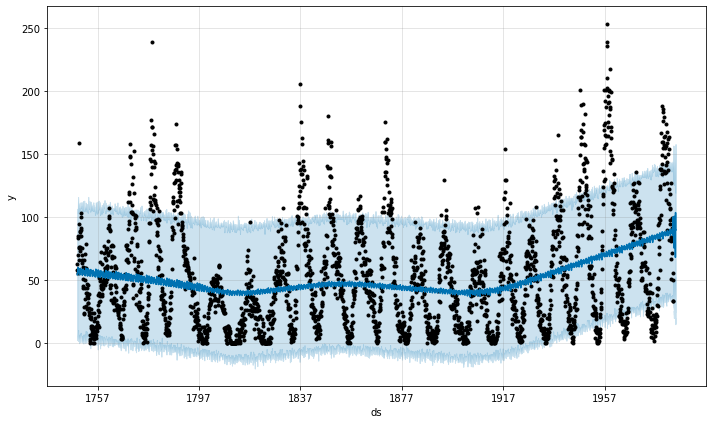

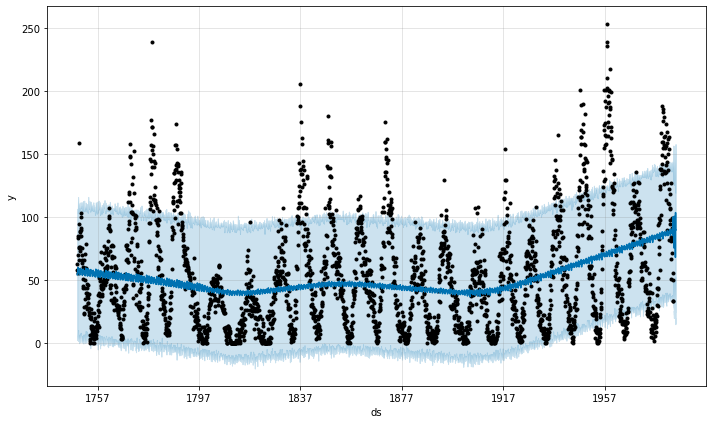

In [18]:

### plot the predicted projection
model.plot(prediction)

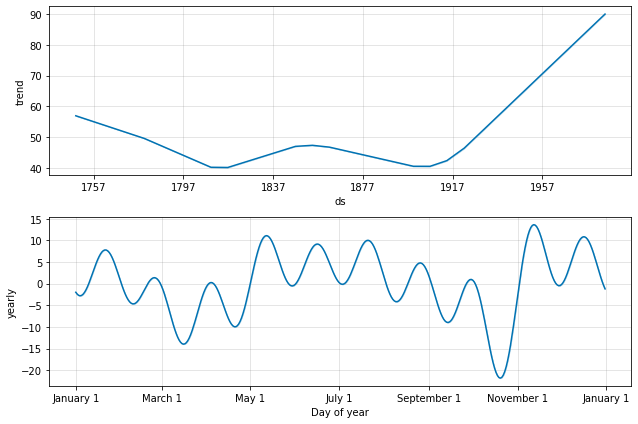

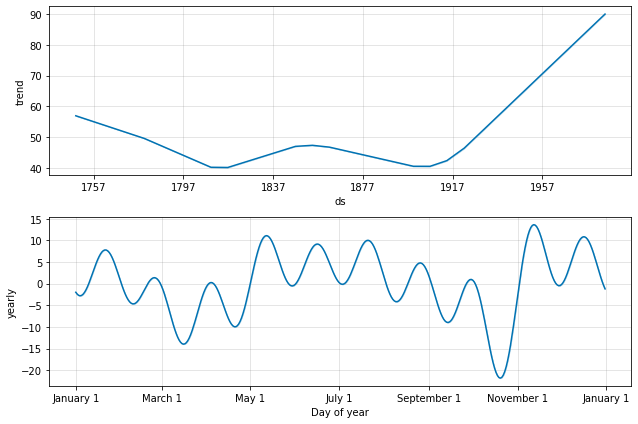

In [19]:

#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [20]:
df.shape

(2820, 2)

In [22]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='2090 days', period='730 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 115 forecasts with cutoffs between 1755-01-25 00:00:00 and 1982-12-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1755-02-01,-0.202645,-17.856983,19.702233,11.2,1755-01-25
1,1755-03-01,-8.972085,-29.230743,10.508724,6.8,1755-01-25
2,1755-04-01,1.200386,-18.607629,20.303458,6.5,1755-01-25
3,1755-05-01,6.346693,-12.734445,25.756091,0.0,1755-01-25
4,1755-06-01,10.068113,-8.577188,29.641923,0.0,1755-01-25


In [23]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,39 days,1631.246987,40.388699,32.441170,0.640034,0.731884
1,40 days,1635.182741,40.437393,32.649758,0.656644,0.731884
2,41 days,1637.980186,40.471968,32.638109,0.640034,0.731884
3,42 days,1648.028294,40.595915,32.934674,0.640034,0.733696
4,43 days,1706.376819,41.308314,33.744790,0.656644,0.721014


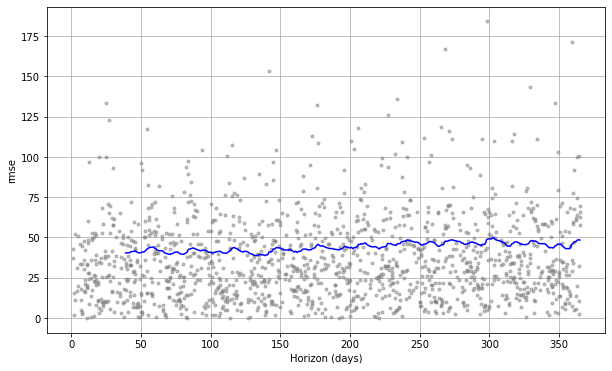

In [24]:

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')